In [1]:
import pickle
pkl_mnist_file = '/kaggle/input/mnistmm/dataset/mnist.pkl'
pkl_mnistm_file = '/kaggle/input/mnistmm/dataset/mnistm.pkl'
with open(pkl_mnist_file, 'rb') as f:
    data_mnist = pickle.load(f)
with open(pkl_mnistm_file, 'rb') as f:
    data_mnistm = pickle.load(f)

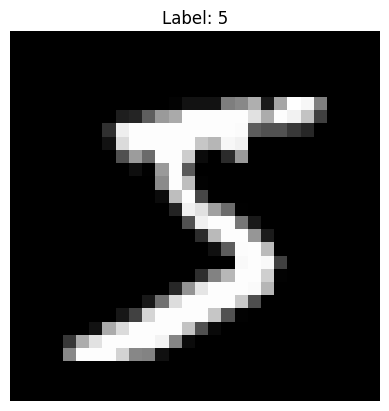

In [3]:
import matplotlib.pyplot as plt

images = data_mnist[b'images']
labels = data_mnist[b'labels']
plt.imshow(images[0], cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.axis('off')
plt.show()

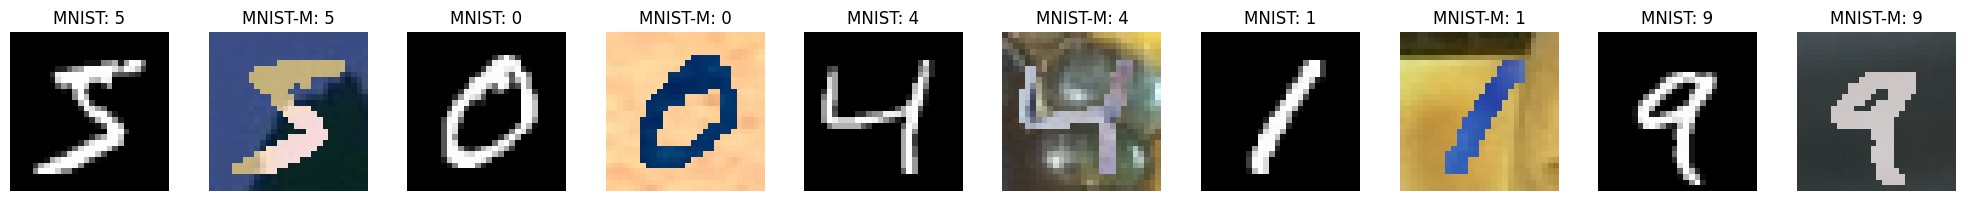

In [4]:
import matplotlib.pyplot as plt
import numpy as np

mnist_images = data_mnist[b'images']
mnist_labels = data_mnist[b'labels']
mnistm_images = data_mnistm[b'images']
mnistm_labels = data_mnistm[b'labels']
indices = range(5)
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, idx in enumerate(indices):
    #grayscale
    axes[2*i].imshow(mnist_images[idx], cmap='gray')
    axes[2*i].set_title(f'MNIST: {mnist_labels[idx]}')
    axes[2*i].axis('off')
    #RGB
    axes[2*i + 1].imshow(mnistm_images[idx])
    axes[2*i + 1].set_title(f'MNIST-M: {mnistm_labels[idx]}')
    axes[2*i + 1].axis('off')
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor, Lambda
from PIL import Image

mnist_images_rgb = np.repeat(mnist_images[:, :, :, np.newaxis], 3, axis=3)  # Shape: (num_samples, 28, 28, 3)
#resize and normalize
transform = Compose([
    ToTensor(),        # Convert to tensor (normalizes to [0, 1], converts to (C, H, W))
    Resize((32, 32)),  # Resize to 32x32
    Lambda(lambda x: x * 2 - 1)  # Scale from [0, 1] to [-1, 1]
])

def preprocess_images(images):
    processed_images = []
    for img in images:
        img = img.astype(np.uint8)
        img = Image.fromarray(img)
        img = transform(img)
        processed_images.append(img)
    return torch.stack(processed_images)

mnist_images_processed = preprocess_images(mnist_images_rgb)
mnistm_images_processed = preprocess_images(mnistm_images)

mnist_labels_tensor = torch.from_numpy(mnist_labels).long()
mnistm_labels_tensor = torch.from_numpy(mnistm_labels).long()
mnist_dataset = TensorDataset(mnist_images_processed, mnist_labels_tensor)
mnistm_dataset = TensorDataset(mnistm_images_processed, mnistm_labels_tensor)
batch_size = 32
mnist_loader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)
mnistm_loader = DataLoader(mnistm_dataset, batch_size=batch_size, shuffle=True)
print(f"MNIST images shape: {mnist_images_processed.shape}")
print(f"MNIST labels shape: {mnist_labels_tensor.shape}")
print(f"MNIST-M images shape: {mnistm_images_processed.shape}")
print(f"MNIST-M labels shape: {mnistm_labels_tensor.shape}")

MNIST images shape: torch.Size([70000, 3, 32, 32])
MNIST labels shape: torch.Size([70000])
MNIST-M images shape: torch.Size([70000, 3, 32, 32])
MNIST-M labels shape: torch.Size([70000])


In [6]:
from sklearn.model_selection import train_test_split

mnist_images_rgb = np.repeat(mnist_images[:, :, :, np.newaxis], 3, axis=3)
num_samples = len(mnist_images)
indices = np.arange(num_samples)
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)
mnist_train_images = mnist_images_rgb[train_indices]
mnist_train_labels = mnist_labels[train_indices]
mnist_test_images = mnist_images_rgb[test_indices]
mnist_test_labels = mnist_labels[test_indices]

mnistm_train_images = mnistm_images[train_indices]
mnistm_train_labels = mnistm_labels[train_indices]
mnistm_test_images = mnistm_images[test_indices]
mnistm_test_labels = mnistm_labels[test_indices]

transform = Compose([
    ToTensor(),        
    Resize((32, 32)),
    Lambda(lambda x: x * 2 - 1)
])

def preprocess_images(images):
    processed_images = []
    for img in images:
        img = img.astype(np.uint8)
        img = Image.fromarray(img)
        img = transform(img)
        processed_images.append(img)
    return torch.stack(processed_images)

mnist_train_images_processed = preprocess_images(mnist_train_images)
mnist_test_images_processed = preprocess_images(mnist_test_images)
mnistm_train_images_processed = preprocess_images(mnistm_train_images)
mnistm_test_images_processed = preprocess_images(mnistm_test_images)

mnist_train_labels_tensor = torch.from_numpy(mnist_train_labels).long()
mnist_test_labels_tensor = torch.from_numpy(mnist_test_labels).long()
mnistm_train_labels_tensor = torch.from_numpy(mnistm_train_labels).long()
mnistm_test_labels_tensor = torch.from_numpy(mnistm_test_labels).long()

mnist_train_dataset = TensorDataset(mnist_train_images_processed, mnist_train_labels_tensor)
mnist_test_dataset = TensorDataset(mnist_test_images_processed, mnist_test_labels_tensor)
mnistm_train_dataset = TensorDataset(mnistm_train_images_processed, mnistm_train_labels_tensor)
mnistm_test_dataset = TensorDataset(mnistm_test_images_processed, mnistm_test_labels_tensor)

batch_size = 32
mnist_train_loader = DataLoader(mnist_train_dataset, batch_size=batch_size, shuffle=True)
mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=batch_size, shuffle=False)
mnistm_train_loader = DataLoader(mnistm_train_dataset, batch_size=batch_size, shuffle=True)
mnistm_test_loader = DataLoader(mnistm_test_dataset, batch_size=batch_size, shuffle=False)

print(f"MNIST train images shape: {mnist_train_images_processed.shape}")
print(f"MNIST train labels shape: {mnist_train_labels_tensor.shape}")
print(f"MNIST test images shape: {mnist_test_images_processed.shape}")
print(f"MNIST test labels shape: {mnist_test_labels_tensor.shape}")
print(f"MNIST-M train images shape: {mnistm_train_images_processed.shape}")
print(f"MNIST-M train labels shape: {mnistm_train_labels_tensor.shape}")
print(f"MNIST-M test images shape: {mnistm_test_images_processed.shape}")
print(f"MNIST-M test labels shape: {mnistm_test_labels_tensor.shape}")

MNIST train images shape: torch.Size([56000, 3, 32, 32])
MNIST train labels shape: torch.Size([56000])
MNIST test images shape: torch.Size([14000, 3, 32, 32])
MNIST test labels shape: torch.Size([14000])
MNIST-M train images shape: torch.Size([56000, 3, 32, 32])
MNIST-M train labels shape: torch.Size([56000])
MNIST-M test images shape: torch.Size([14000, 3, 32, 32])
MNIST-M test labels shape: torch.Size([14000])


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset
import numpy as np

class MNISTMClassifier(nn.Module):
    def __init__(self):
        super(MNISTMClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48 * 8 * 8, 100),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(100, 100),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

#loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNISTMClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

def evaluate_model(model, data_loader, dataset_name):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy on {dataset_name}: {accuracy:.2f}%")
    return accuracy
num_epochs = 10
train_model(model, mnist_train_loader, criterion, optimizer, num_epochs)
mnist_test_accuracy = evaluate_model(model, mnist_test_loader, "MNIST Test")
#full evaluation
mnistm_full_dataset = ConcatDataset([mnistm_train_dataset, mnistm_test_dataset])
mnistm_full_loader = DataLoader(mnistm_full_dataset, batch_size=32, shuffle=False)
#full MNIST-M dataset
mnistm_full_accuracy = evaluate_model(model, mnistm_full_loader, "MNIST-M Full")
print("\nDomain Gap Analysis:")
print(f"Accuracy difference (MNIST Test - MNIST-M Full): {mnist_test_accuracy - mnistm_full_accuracy:.2f}%")

Epoch [1/10], Loss: 0.3593
Epoch [2/10], Loss: 0.1429
Epoch [3/10], Loss: 0.1105
Epoch [4/10], Loss: 0.0940
Epoch [5/10], Loss: 0.0787
Epoch [6/10], Loss: 0.0710
Epoch [7/10], Loss: 0.0660
Epoch [8/10], Loss: 0.0592
Epoch [9/10], Loss: 0.0595
Epoch [10/10], Loss: 0.0529
Accuracy on MNIST Test: 98.98%
Accuracy on MNIST-M Full: 56.63%

Domain Gap Analysis:
Accuracy difference (MNIST Test - MNIST-M Full): 42.35%


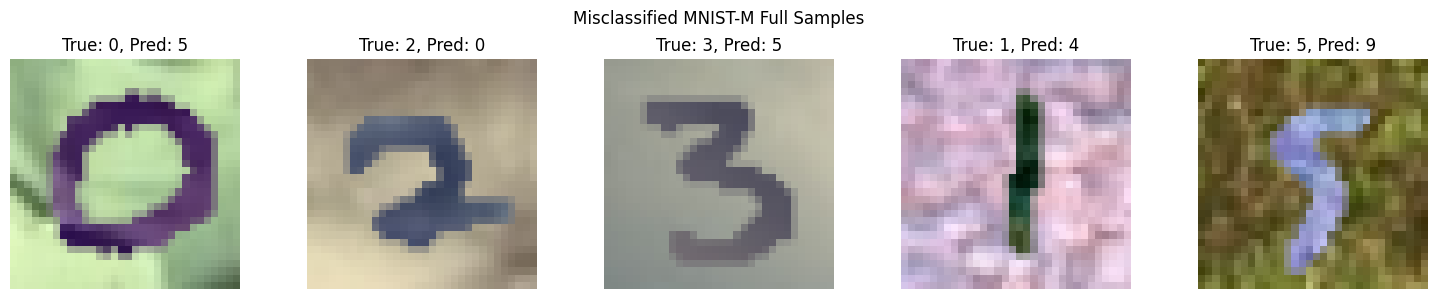

In [8]:
import matplotlib.pyplot as plt

def visualize_misclassifications(model, data_loader, dataset_name, num_samples=5):
    model.eval()
    misclassified = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            incorrect = predicted != labels
            for img, true, pred in zip(images[incorrect], labels[incorrect], predicted[incorrect]):
                misclassified.append((img.cpu(), true.cpu(), pred.cpu()))
                if len(misclassified) >= num_samples:
                    break
            if len(misclassified) >= num_samples:
                break
    
    # Plot misclassified samples
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, (img, true, pred) in enumerate(misclassified):
        img = (img + 1) / 2  # Denormalize to [0, 1]
        axes[i].imshow(img.permute(1, 2, 0))
        axes[i].set_title(f"True: {true}, Pred: {pred}")
        axes[i].axis('off')
    plt.suptitle(f"Misclassified {dataset_name} Samples")
    plt.tight_layout()
    plt.show()

visualize_misclassifications(model, mnistm_full_loader, "MNIST-M Full")

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

class Generator(nn.Module):
    def __init__(self, input_channels=3, noise_dim=100, num_filters=64):
        super(Generator, self).__init__()
        self.noise_fc = nn.Linear(noise_dim, 1 * 32 * 32)
        self.initial_conv = nn.Sequential(
            nn.Conv2d(input_channels + 1, num_filters, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(inplace=True)
        )
        self.res_blocks = nn.Sequential(
            *[ResidualBlock(num_filters) for _ in range(6)]
        )
        self.output_conv = nn.Conv2d(num_filters, 3, kernel_size=3, stride=1, padding=1)
        self.output_act = nn.Tanh()

    def forward(self, x, z):
        z = self.noise_fc(z).view(-1, 1, 32, 32)
        x = torch.cat([x, z], dim=1)
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.output_conv(x)
        x = self.output_act(x)
        return x

class Discriminator(nn.Module):
    def __init__(self, input_channels=3):
        super(Discriminator, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(128, 256, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(256, 512, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
       #matching output shape
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                x = layer(x)
                x = x + torch.randn_like(x) * 0.2 
            else:
                x = layer(x)
        x = self.classifier(x)
        return x

class TaskClassifier(nn.Module):
    def __init__(self, input_channels=3):
        super(TaskClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48 * 8 * 8, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(input_channels=3, noise_dim=100, num_filters=64).to(device)
discriminator = Discriminator(input_channels=3).to(device)
task_classifier = TaskClassifier(input_channels=3).to(device)

g_optimizer = optim.Adam(generator.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
d_optimizer = optim.Adam(discriminator.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
t_optimizer = optim.Adam(task_classifier.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
criterion_d = nn.BCELoss()
criterion_t = nn.CrossEntropyLoss()

alpha = 0.13
beta = 0.01
g_loss_weight = 0.011

#training function
def train_pixeldan(num_epochs=10):
    generator.train()
    discriminator.train()
    task_classifier.train()
    
    for epoch in range(num_epochs):
        for (source_images, source_labels), (target_images, _) in zip(mnist_train_loader, mnistm_train_loader):
            source_images, source_labels = source_images.to(device), source_labels.to(device)
            target_images = target_images.to(device)
            batch_size = source_images.size(0)
            #labels for discriminator
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)
            #update Discriminator and Task Classifier
            d_optimizer.zero_grad()
            t_optimizer.zero_grad()
            #discriminator on real target images
            d_real = discriminator(target_images)
            d_loss_real = criterion_d(d_real, real_labels)
            
            #discriminator on fake (generated) images
            noise = torch.FloatTensor(batch_size, 100).uniform_(-1, 1).to(device)
            fake_images = generator(source_images, noise)
            d_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion_d(d_fake, fake_labels)
            
            #Total discriminator loss
            d_loss = alpha * (d_loss_real + d_loss_fake)
            d_loss.backward()
            d_optimizer.step()
            #task Classifier on source and fake images
            t_source = task_classifier(source_images)
            t_fake = task_classifier(fake_images.detach())
            t_loss = criterion_t(t_source, source_labels) + criterion_t(t_fake, source_labels)
            t_loss.backward()
            t_optimizer.step()
            #update Generator
            g_optimizer.zero_grad()
            d_fake = discriminator(fake_images)
            g_loss_d = criterion_d(d_fake, real_labels)
            t_fake = task_classifier(fake_images)
            g_loss_t = criterion_t(t_fake, source_labels)
            g_loss = g_loss_weight * g_loss_d + beta * g_loss_t
            g_loss.backward()
            g_optimizer.step()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, T Loss: {t_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

train_pixeldan(num_epochs=10)
torch.save(generator.state_dict(), "generator.pth")
torch.save(discriminator.state_dict(), "discriminator.pth")
torch.save(task_classifier.state_dict(), "task_classifier.pth")

Epoch [1/10], D Loss: 0.1422, T Loss: 0.2091, G Loss: 0.0253
Epoch [2/10], D Loss: 0.1140, T Loss: 0.6051, G Loss: 0.0209
Epoch [3/10], D Loss: 0.1386, T Loss: 0.0169, G Loss: 0.0167
Epoch [4/10], D Loss: 0.1238, T Loss: 0.2022, G Loss: 0.0232
Epoch [5/10], D Loss: 0.1693, T Loss: 0.3474, G Loss: 0.0178
Epoch [6/10], D Loss: 0.1398, T Loss: 0.3819, G Loss: 0.0138
Epoch [7/10], D Loss: 0.1664, T Loss: 0.2297, G Loss: 0.0154
Epoch [8/10], D Loss: 0.1397, T Loss: 0.2056, G Loss: 0.0119
Epoch [9/10], D Loss: 0.1352, T Loss: 0.0582, G Loss: 0.0205
Epoch [10/10], D Loss: 0.1289, T Loss: 0.3342, G Loss: 0.0167


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


# Residual Block for Generator
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

# Generator (G): Maps source image and noise to adapted image
class Generator(nn.Module):
    def __init__(self, input_channels=3, noise_dim=100, num_filters=64):
        super(Generator, self).__init__()
        self.noise_fc = nn.Linear(noise_dim, 1 * 32 * 32)
        self.initial_conv = nn.Sequential(
            nn.Conv2d(input_channels + 1, num_filters, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(inplace=True)
        )
        self.res_blocks = nn.Sequential(
            *[ResidualBlock(num_filters) for _ in range(6)]
        )
        self.output_conv = nn.Conv2d(num_filters, 3, kernel_size=3, stride=1, padding=1)
        self.output_act = nn.Tanh()

    def forward(self, x, z):
        z = self.noise_fc(z).view(-1, 1, 32, 32)
        x = torch.cat([x, z], dim=1)
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.output_conv(x)
        x = self.output_act(x)
        return x

# Discriminator (D): Distinguishes real vs. fake images
class Discriminator(nn.Module):
    def __init__(self, input_channels=3):
        super(Discriminator, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(128, 256, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(256, 512, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                x = layer(x)
                x = x + torch.randn_like(x) * 0.2
            else:
                x = layer(x)
        x = self.classifier(x)
        return x

# Task Classifier (T): Digit classification (based on [14])
class TaskClassifier(nn.Module):
    def __init__(self, input_channels=3):
        super(TaskClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48 * 8 * 8, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(input_channels=3, noise_dim=100, num_filters=64).to(device)
discriminator = Discriminator(input_channels=3).to(device)
task_classifier = TaskClassifier(input_channels=3).to(device)


def init_weights(m):
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.normal_(m.weight, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

generator.apply(init_weights)
discriminator.apply(init_weights)
task_classifier.apply(init_weights)

#Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
d_optimizer = optim.Adam(discriminator.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
t_optimizer = optim.Adam(task_classifier.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)

# Loss functions
#Adversarial loss (L_d)
criterion_d = nn.BCELoss()  
#Task-specific loss (L_t)
criterion_t = nn.CrossEntropyLoss()

#Hyperparameters
alpha = 0.13
beta = 0.01 
g_loss_weight = 0.011

def train_pixeldan(num_epochs=10):
    generator.train()
    discriminator.train()
    task_classifier.train()
    
    for epoch in range(num_epochs):
        for (source_images, source_labels), (target_images, _) in zip(mnist_train_loader, mnistm_train_loader):
            source_images, source_labels = source_images.to(device), source_labels.to(device)
            target_images = target_images.to(device)
            batch_size = source_images.size(0)
            
            # Labels for discriminator
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)
            
            #Update Discriminator and Task Classifier (theta_D, theta_T)
            d_optimizer.zero_grad()
            t_optimizer.zero_grad()
            
            # Discriminator on real target images (E[log D(x^t)])
            d_real = discriminator(target_images)
            d_loss_real = criterion_d(d_real, real_labels)
            
            # Discriminator on fake images (E[log(1 - D(G(x^s, z)))])
            noise = torch.FloatTensor(batch_size, 100).uniform_(-1, 1).to(device)
            fake_images = generator(source_images, noise)
            d_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion_d(d_fake, fake_labels)
            
            # Total discriminator loss: alpha * L_d
            d_loss = alpha * (d_loss_real + d_loss_fake)
            d_loss.backward()
            d_optimizer.step()
            
            # Task Classifier on source and fake images (L_t)
            t_source = task_classifier(source_images)  # T(x^s)
            t_fake = task_classifier(fake_images.detach())  # T(G(x^s, z))
            t_loss_source = criterion_t(t_source, source_labels)
            t_loss_fake = criterion_t(t_fake, source_labels)
            t_loss = t_loss_source + t_loss_fake  # E[-y^s log T(x^s)] + E[-y^s log T(G(x^s, z))]
            t_loss.backward()
            t_optimizer.step()
            
            #Update Generator (theta_G)
            g_optimizer.zero_grad()
            d_fake = discriminator(fake_images)  # D(G(x^s, z))
            g_loss_d = criterion_d(d_fake, real_labels)  # E[log D(G(x^s, z))] (fool discriminator)
            t_fake = task_classifier(fake_images)  # T(G(x^s, z))
            g_loss_t = criterion_t(t_fake, source_labels)  # E[-y^s log T(G(x^s, z))]
            g_loss = g_loss_weight * g_loss_d + beta * g_loss_t  # g_loss_weight * L_d + beta * L_t
            g_loss.backward()
            g_optimizer.step()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, T Loss: {t_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

train_pixeldan(num_epochs=10)
torch.save(generator.state_dict(), "generator.pth")
torch.save(discriminator.state_dict(), "discriminator.pth")
torch.save(task_classifier.state_dict(), "task_classifier.pth")

Epoch [1/10], D Loss: 0.1961, T Loss: 0.5550, G Loss: 0.0090
Epoch [2/10], D Loss: 0.1623, T Loss: 0.0233, G Loss: 0.0089
Epoch [3/10], D Loss: 0.1427, T Loss: 0.1140, G Loss: 0.0190
Epoch [4/10], D Loss: 0.1526, T Loss: 0.0529, G Loss: 0.0126
Epoch [5/10], D Loss: 0.1560, T Loss: 0.0398, G Loss: 0.0165
Epoch [6/10], D Loss: 0.1356, T Loss: 0.1455, G Loss: 0.0137
Epoch [7/10], D Loss: 0.1529, T Loss: 0.2357, G Loss: 0.0122
Epoch [8/10], D Loss: 0.2072, T Loss: 0.3382, G Loss: 0.0258
Epoch [9/10], D Loss: 0.1538, T Loss: 0.0327, G Loss: 0.0141
Epoch [10/10], D Loss: 0.1303, T Loss: 0.0723, G Loss: 0.0190


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
from uuid import uuid4

#Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

#Generator (G)
class Generator(nn.Module):
    def __init__(self, input_channels=3, noise_dim=100, num_filters=64):
        super(Generator, self).__init__()
        self.noise_fc = nn.Linear(noise_dim, 1 * 32 * 32)
        self.initial_conv = nn.Sequential(
            nn.Conv2d(input_channels + 1, num_filters, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(inplace=True)
        )
        self.res_blocks = nn.Sequential(
            *[ResidualBlock(num_filters) for _ in range(6)]
        )
        self.output_conv = nn.Conv2d(num_filters, 3, kernel_size=3, stride=1, padding=1)
        self.output_act = nn.Tanh()

    def forward(self, x, z):
        z = self.noise_fc(z).view(-1, 1, 32, 32)
        x = torch.cat([x, z], dim=1)
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.output_conv(x)
        x = self.output_act(x)
        return x

#Discriminator (D)
class Discriminator(nn.Module):
    def __init__(self, input_channels=3):
        super(Discriminator, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=1, stride=1, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(128, 256, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(256, 512, kernel_size=2, stride=2, padding=0),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                x = layer(x)
                x = x + torch.randn_like(x) * 0.2
            else:
                x = layer(x)
        x = self.classifier(x)
        return x

#Task Classifier (T)
class TaskClassifier(nn.Module):
    def __init__(self, input_channels=3):
        super(TaskClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48 * 8 * 8, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

def evaluate_classifier(classifier, loader, device):
    classifier.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = classifier(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    classifier.train()
    return accuracy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(input_channels=3, noise_dim=100, num_filters=64).to(device)
discriminator = Discriminator(input_channels=3).to(device)
task_classifier = TaskClassifier(input_channels=3).to(device)

def init_weights(m):
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.normal_(m.weight, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

generator.apply(init_weights)
discriminator.apply(init_weights)
task_classifier.apply(init_weights)
#optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
d_optimizer = optim.Adam(discriminator.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
t_optimizer = optim.Adam(task_classifier.parameters(), lr=1e-3, betas=(0.5, 0.999), weight_decay=1e-5)
#Loss
criterion_d = nn.BCELoss()  # Adversarial loss (L_d)
criterion_t = nn.CrossEntropyLoss()  # Task-specific loss (L_t)
#discriminator loss weight
alpha = 0.13
#task loss weight in G step
beta = 0.01
#generator adversarial loss weight
g_loss_weight = 0.011  

#checkpoints
checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

#history
history = {
    "d_loss": [],
    "g_loss": [],
    "t_loss": [],
    "train_acc_mnist": [],
    "test_acc_mnist": [],
    "test_acc_mnistm": []
}

def train_pixeldan(num_epochs=10, resume_epoch=0):
    generator.train()
    discriminator.train()
    task_classifier.train()

    start_epoch = resume_epoch
    if resume_epoch > 0:
        #checkpoints
        generator.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"generator_epoch_{resume_epoch}.pth")))
        discriminator.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"discriminator_epoch_{resume_epoch}.pth")))
        task_classifier.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"task_classifier_epoch_{resume_epoch}.pth")))

    for epoch in range(start_epoch, num_epochs):
        epoch_d_loss = 0.0
        epoch_g_loss = 0.0
        epoch_t_loss = 0.0
        num_batches = 0
        for (source_images, source_labels), (target_images, _) in zip(mnist_train_loader, mnistm_train_loader):
            source_images, source_labels = source_images.to(device), source_labels.to(device)
            target_images = target_images.to(device)
            batch_size = source_images.size(0)
            #labels for discriminator
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)
            #update Discriminator and Task Classifier (theta_D, theta_T)
            d_optimizer.zero_grad()
            t_optimizer.zero_grad()
            #discriminator on real target images (E[log D(x^t)])
            d_real = discriminator(target_images)
            d_loss_real = criterion_d(d_real, real_labels)
            #discriminator on fake images (E[log(1 - D(G(x^s, z)))])
            noise = torch.FloatTensor(batch_size, 100).uniform_(-1, 1).to(device)
            fake_images = generator(source_images, noise)
            d_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion_d(d_fake, fake_labels)

            #total discriminator loss: alpha * L_d
            d_loss = alpha * (d_loss_real + d_loss_fake)
            d_loss.backward()
            d_optimizer.step()
            #task Classifier on source and fake images (L_t)
            t_source = task_classifier(source_images)  # T(x^s)
            t_fake = task_classifier(fake_images.detach())  # T(G(x^s, z))
            t_loss_source = criterion_t(t_source, source_labels)
            t_loss_fake = criterion_t(t_fake, source_labels)
            t_loss = t_loss_source + t_loss_fake  # E[-y^s log T(x^s)] + E[-y^s log T(G(x^s, z))]
            t_loss.backward()
            t_optimizer.step()
            #update Generator (theta_G)
            g_optimizer.zero_grad()
            d_fake = discriminator(fake_images)  # D(G(x^s, z))
            g_loss_d = criterion_d(d_fake, real_labels)  # E[log D(G(x^s, z))] (fool discriminator)
            t_fake = task_classifier(fake_images)  # T(G(x^s, z))
            g_loss_t = criterion_t(t_fake, source_labels)  # E[-y^s log T(G(x^s, z))]
            g_loss = g_loss_weight * g_loss_d + beta * g_loss_t  # g_loss_weight * L_d + beta * L_t
            g_loss.backward()
            g_optimizer.step()

            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            epoch_t_loss += t_loss.item()
            num_batches += 1
        epoch_d_loss /= num_batches
        epoch_g_loss /= num_batches
        epoch_t_loss /= num_batches
        #Evaluate
        train_acc_mnist = evaluate_classifier(task_classifier, mnist_train_loader, device)
        test_acc_mnist = evaluate_classifier(task_classifier, mnist_test_loader, device)
        test_acc_mnistm = evaluate_classifier(task_classifier, mnistm_test_loader, device)
        #history
        history["d_loss"].append(epoch_d_loss)
        history["g_loss"].append(epoch_g_loss)
        history["t_loss"].append(epoch_t_loss)
        history["train_acc_mnist"].append(train_acc_mnist)
        history["test_acc_mnist"].append(test_acc_mnist)
        history["test_acc_mnistm"].append(test_acc_mnistm)
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"D Loss: {epoch_d_loss:.4f}, G Loss: {epoch_g_loss:.4f}, T Loss: {epoch_t_loss:.4f}, "
              f"Train Acc MNIST: {train_acc_mnist:.2f}%, Test Acc MNIST: {test_acc_mnist:.2f}%, "
              f"Test Acc MNIST-M: {test_acc_mnistm:.2f}%")

        #checkpoints
        torch.save(generator.state_dict(), os.path.join(checkpoint_dir, f"generator_epoch_{epoch+1}.pth"))
        torch.save(discriminator.state_dict(), os.path.join(checkpoint_dir, f"discriminator_epoch_{epoch+1}.pth"))
        torch.save(task_classifier.state_dict(), os.path.join(checkpoint_dir, f"task_classifier_epoch_{epoch+1}.pth"))
        torch.save(history, os.path.join(checkpoint_dir, f"history_epoch_{epoch+1}.pth"))

train_pixeldan(num_epochs=10, resume_epoch=0)

Epoch [1/10], D Loss: 0.1774, G Loss: 0.0144, T Loss: 0.7687, Train Acc MNIST: 98.42%, Test Acc MNIST: 98.06%, Test Acc MNIST-M: 69.06%
Epoch [2/10], D Loss: 0.1670, G Loss: 0.0149, T Loss: 0.3158, Train Acc MNIST: 98.74%, Test Acc MNIST: 98.45%, Test Acc MNIST-M: 78.27%
Epoch [3/10], D Loss: 0.1566, G Loss: 0.0167, T Loss: 0.2314, Train Acc MNIST: 99.17%, Test Acc MNIST: 98.82%, Test Acc MNIST-M: 84.98%
Epoch [4/10], D Loss: 0.1473, G Loss: 0.0184, T Loss: 0.2009, Train Acc MNIST: 99.36%, Test Acc MNIST: 98.91%, Test Acc MNIST-M: 87.26%
Epoch [5/10], D Loss: 0.1458, G Loss: 0.0182, T Loss: 0.1749, Train Acc MNIST: 99.38%, Test Acc MNIST: 98.87%, Test Acc MNIST-M: 87.07%
Epoch [6/10], D Loss: 0.1575, G Loss: 0.0153, T Loss: 0.1550, Train Acc MNIST: 99.08%, Test Acc MNIST: 98.62%, Test Acc MNIST-M: 88.11%
Epoch [7/10], D Loss: 0.1515, G Loss: 0.0162, T Loss: 0.1467, Train Acc MNIST: 99.54%, Test Acc MNIST: 99.06%, Test Acc MNIST-M: 89.36%
Epoch [8/10], D Loss: 0.1555, G Loss: 0.0150, T 

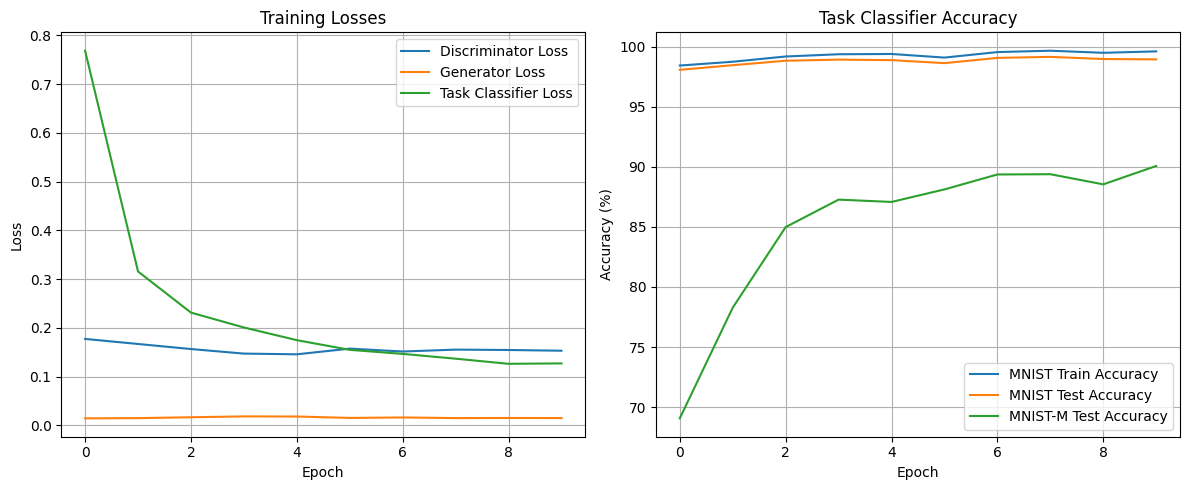

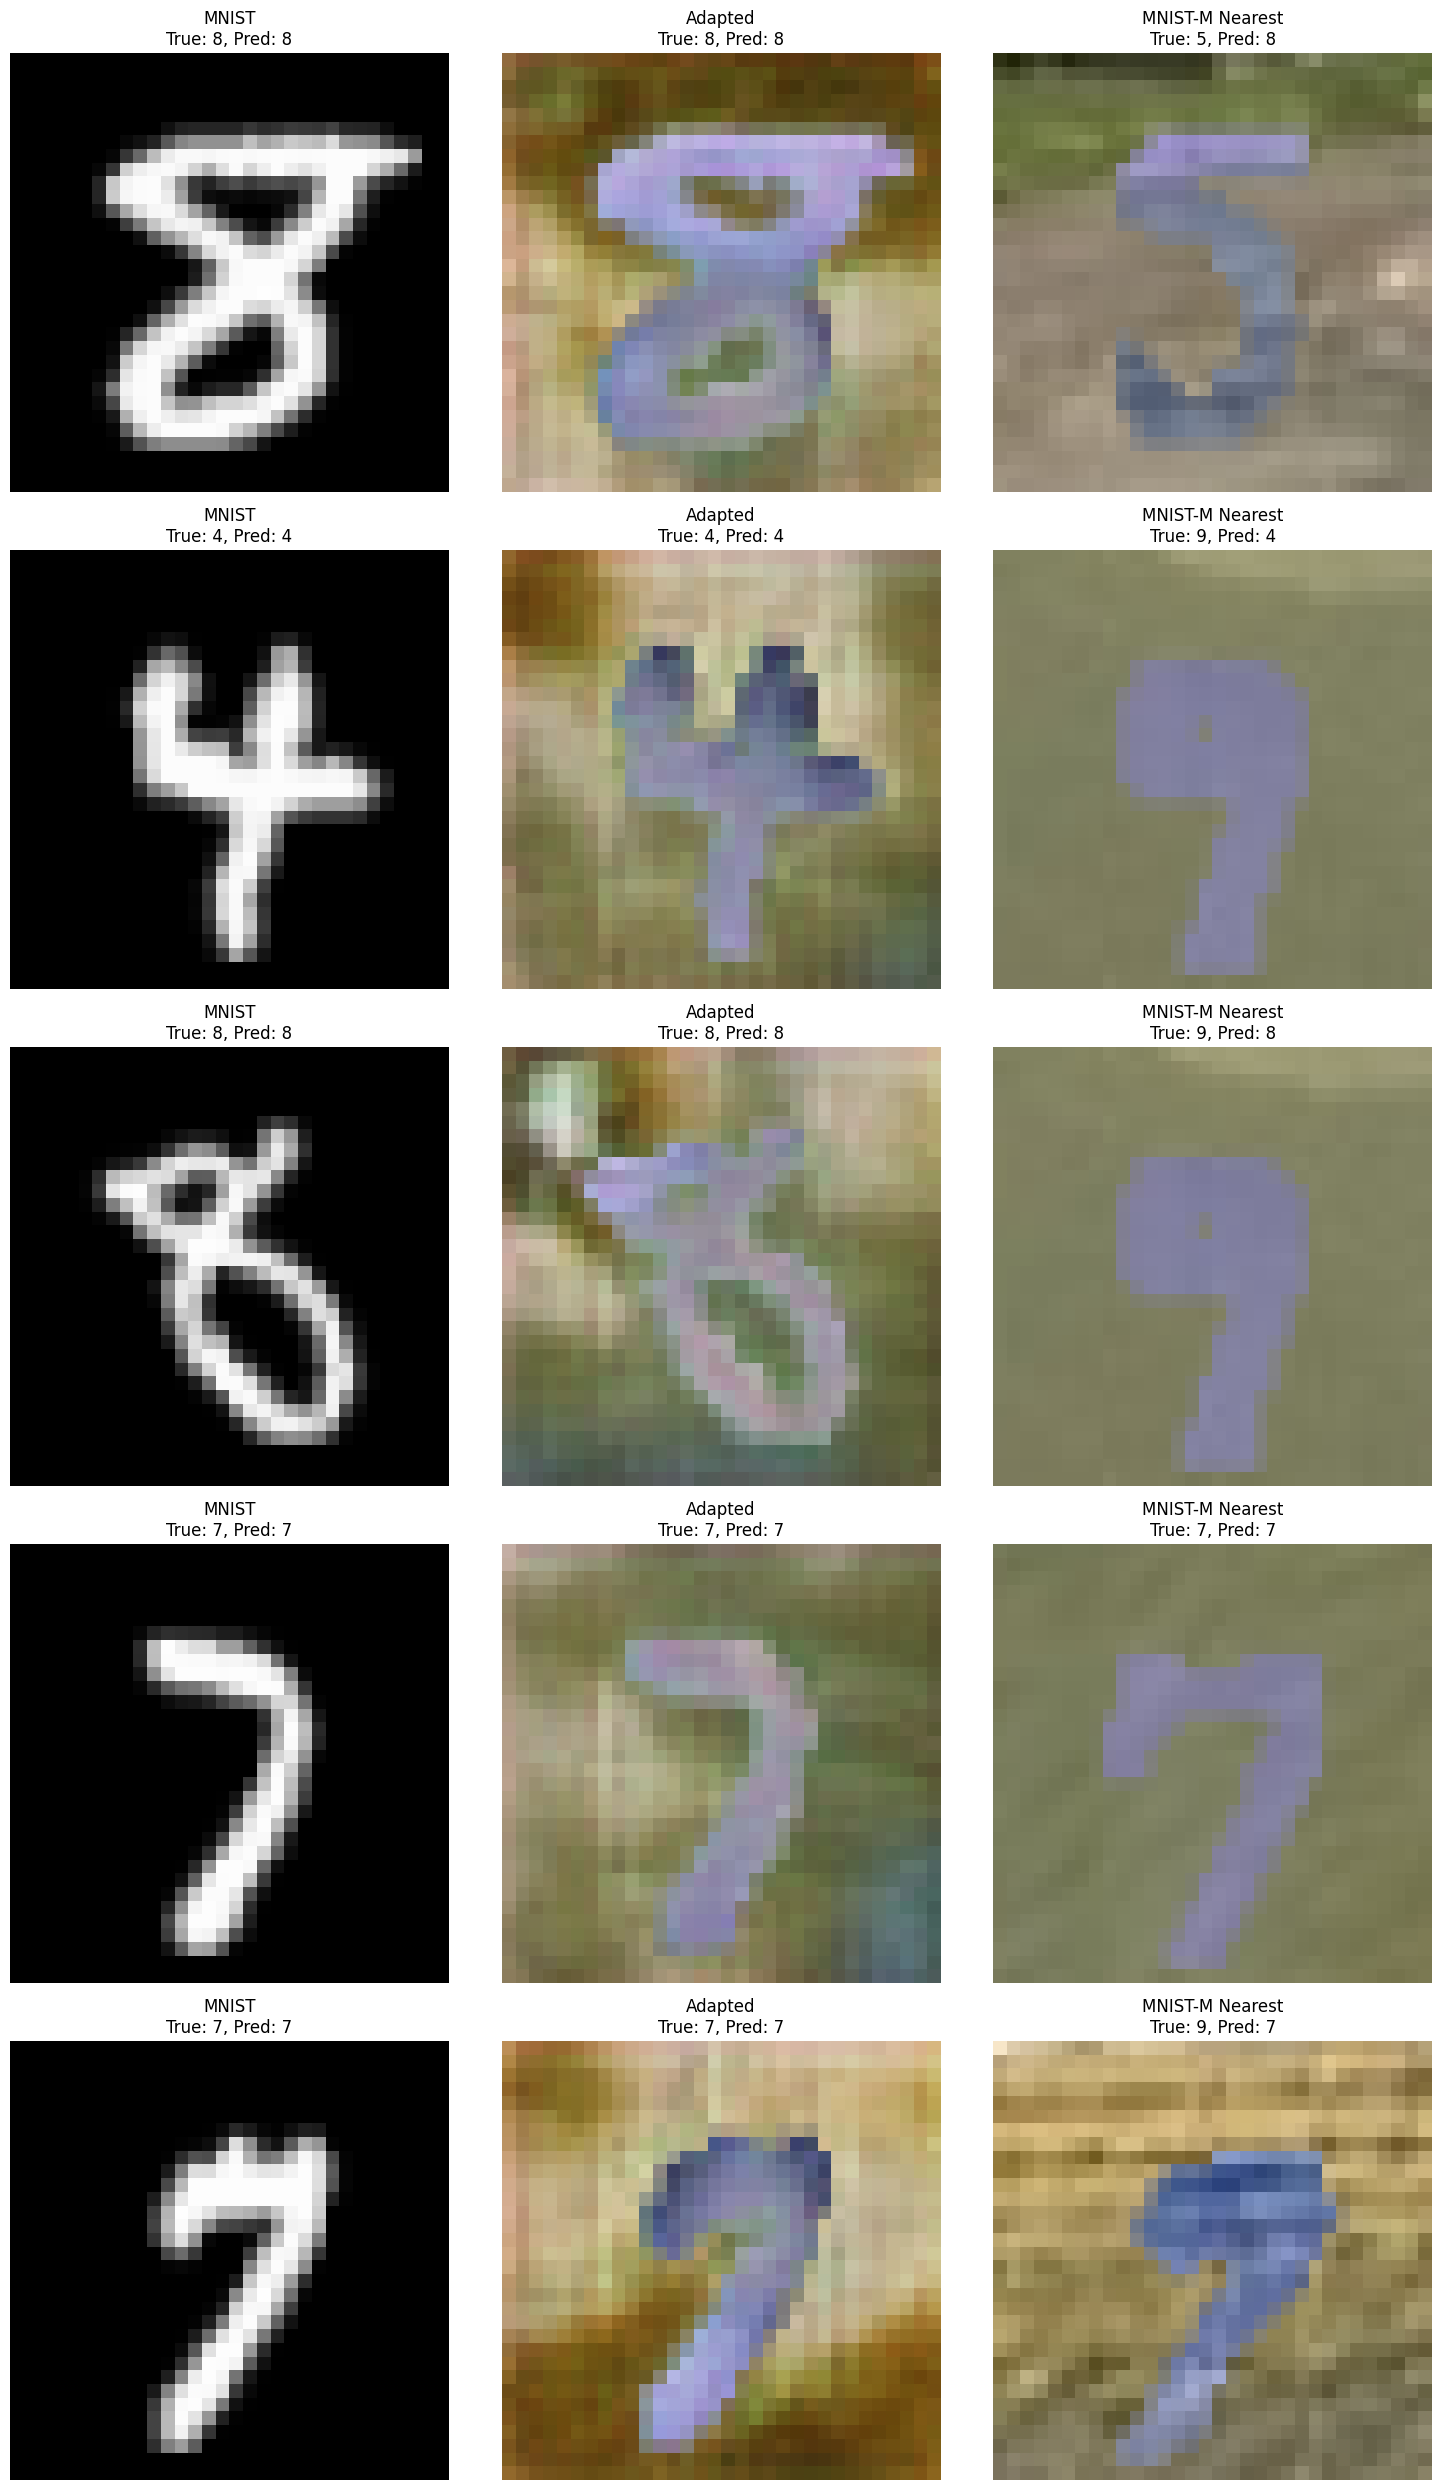

In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import os
from uuid import uuid4


#Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

#generator(G)
class Generator(nn.Module):
    def __init__(self, input_channels=3, noise_dim=100, num_filters=64):
        super(Generator, self).__init__()
        self.noise_fc = nn.Linear(noise_dim, 1 * 32 * 32)
        self.initial_conv = nn.Sequential(
            nn.Conv2d(input_channels + 1, num_filters, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(inplace=True)
        )
        self.res_blocks = nn.Sequential(
            *[ResidualBlock(num_filters) for _ in range(6)]
        )
        self.output_conv = nn.Conv2d(num_filters, 3, kernel_size=3, stride=1, padding=1)
        self.output_act = nn.Tanh()

    def forward(self, x, z):
        z = self.noise_fc(z).view(-1, 1, 32, 32)
        x = torch.cat([x, z], dim=1)
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.output_conv(x)
        x = self.output_act(x)
        return x

# Task Classifier (T)
class TaskClassifier(nn.Module):
    def __init__(self, input_channels=3):
        super(TaskClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48 * 8 * 8, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Function to find nearest neighbor in MNIST-M test set
def find_nearest_neighbor(adapted_image, mnistm_loader, device):
    adapted_image = adapted_image.detach().cpu()
    min_dist = float('inf')
    nearest_image = None
    nearest_label = None
    for images, labels in mnistm_loader:
        images = images.to(device)
        dist = torch.norm(images - adapted_image.to(device), p=2, dim=(1, 2, 3))
        min_dist_batch = dist.min().item()
        if min_dist_batch < min_dist:
            min_dist = min_dist_batch
            nearest_image = images[dist.argmin()].cpu()
            nearest_label = labels[dist.argmin()].item()
    return nearest_image, nearest_label

#history
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint_dir = "checkpoints"
epoch = 10 

generator = Generator(input_channels=3, noise_dim=100, num_filters=64).to(device)
task_classifier = TaskClassifier(input_channels=3).to(device)

generator.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"generator_epoch_{epoch}.pth")))
task_classifier.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"task_classifier_epoch_{epoch}.pth")))
history = torch.load(os.path.join(checkpoint_dir, f"history_epoch_{epoch}.pth"))

generator.eval()
task_classifier.eval()

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history["d_loss"], label="Discriminator Loss")
plt.plot(history["g_loss"], label="Generator Loss")
plt.plot(history["t_loss"], label="Task Classifier Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Losses")
plt.legend()
plt.grid(True)
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history["train_acc_mnist"], label="MNIST Train Accuracy")
plt.plot(history["test_acc_mnist"], label="MNIST Test Accuracy")
plt.plot(history["test_acc_mnistm"], label="MNIST-M Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task Classifier Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(checkpoint_dir, "training_plots.png"))
plt.close()

#Visualization
num_samples = 5
mnist_iter = iter(mnist_test_loader)
mnist_images, mnist_labels = next(mnist_iter)
mnist_images, mnist_labels = mnist_images[:num_samples].to(device), mnist_labels[:num_samples].to(device)

noise = torch.FloatTensor(num_samples, 100).uniform_(-1, 1).to(device)
adapted_images = generator(mnist_images, noise)

# Get Classifier predictions
with torch.no_grad():
    mnist_preds = task_classifier(mnist_images).argmax(dim=1).cpu().numpy()
    adapted_preds = task_classifier(adapted_images).argmax(dim=1).cpu().numpy()

#find nearest MNIST-M images
nearest_images = []
nearest_labels = []
for i in range(num_samples):
    nearest_img, nearest_label = find_nearest_neighbor(adapted_images[i], mnistm_test_loader, device)
    nearest_images.append(nearest_img)
    nearest_labels.append(nearest_label)

#Plot images
plt.figure(figsize=(15, 5 * num_samples))
for i in range(num_samples):
    # MNIST Image
    plt.subplot(num_samples, 3, i * 3 + 1)
    mnist_img = mnist_images[i].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
    plt.imshow(mnist_img)
    plt.title(f"MNIST\nTrue: {mnist_labels[i].item()}, Pred: {mnist_preds[i]}")
    plt.axis("off")
    #adapted Image
    plt.subplot(num_samples, 3, i * 3 + 2)
    adapted_img = adapted_images[i].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
    plt.imshow(adapted_img)
    plt.title(f"Adapted\nTrue: {mnist_labels[i].item()}, Pred: {adapted_preds[i]}")
    plt.axis("off")
    # Nearest MNIST-M Image
    plt.subplot(num_samples, 3, i * 3 + 3)
    nearest_img = nearest_images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
    plt.imshow(nearest_img)
    plt.title(f"MNIST-M Nearest\nTrue: {nearest_labels[i]}, Pred: {adapted_preds[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(checkpoint_dir, "qualitative_results.png"))
plt.close()

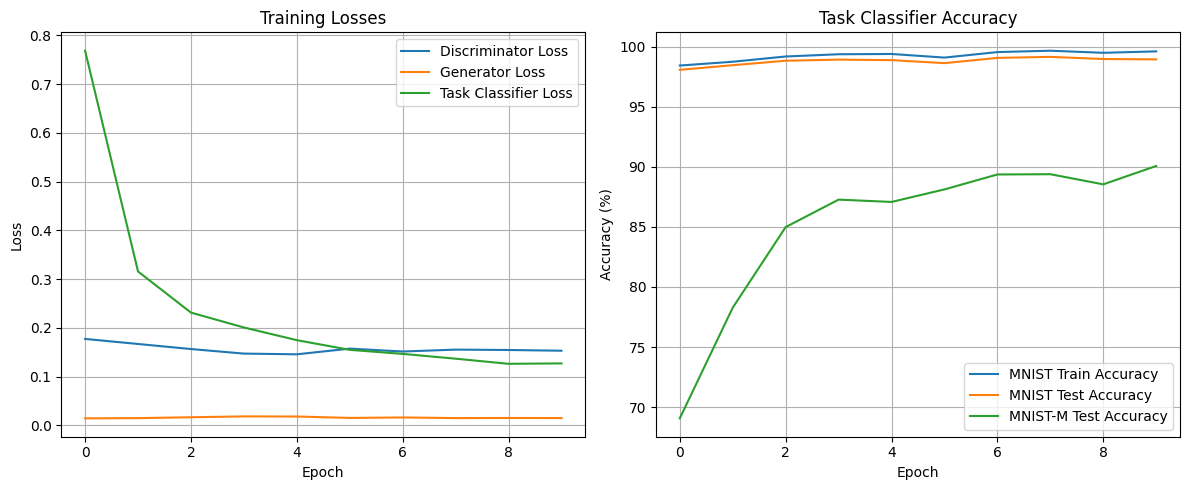

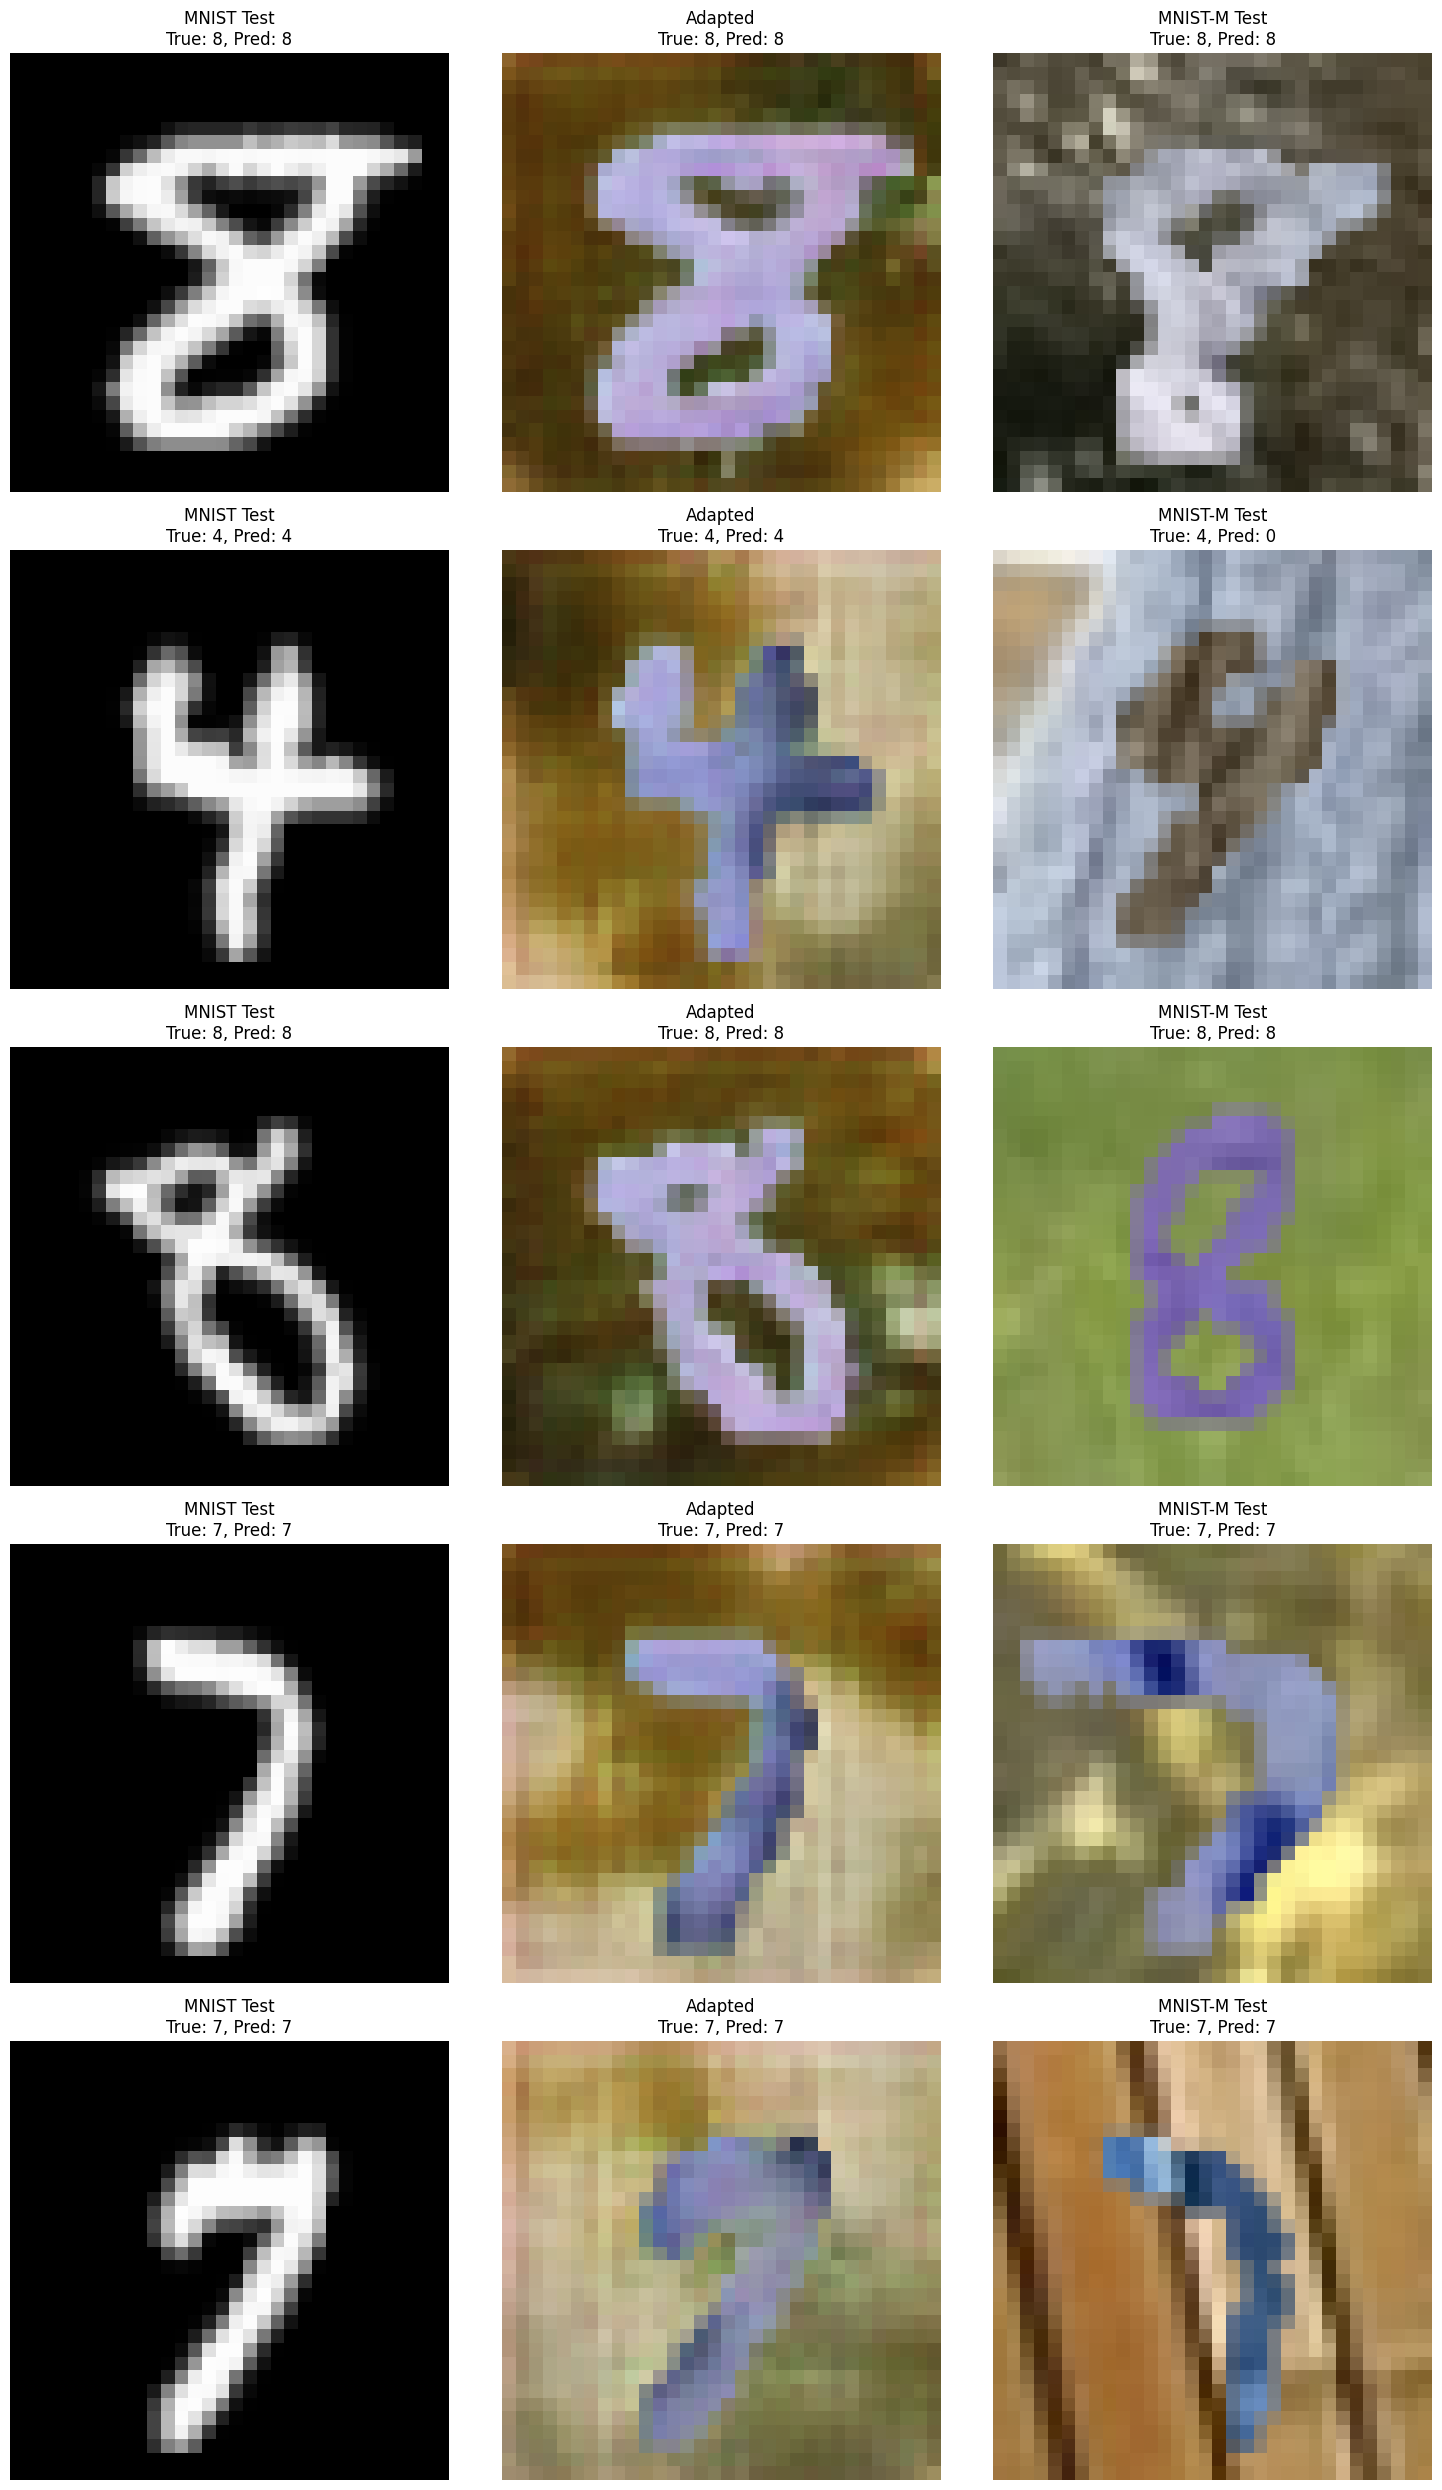

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import os
import random


# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

#generator(G)
class Generator(nn.Module):
    def __init__(self, input_channels=3, noise_dim=100, num_filters=64):
        super(Generator, self).__init__()
        self.noise_fc = nn.Linear(noise_dim, 1 * 32 * 32)
        self.initial_conv = nn.Sequential(
            nn.Conv2d(input_channels + 1, num_filters, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(num_filters),
            nn.ReLU(inplace=True)
        )
        self.res_blocks = nn.Sequential(
            *[ResidualBlock(num_filters) for _ in range(6)]
        )
        self.output_conv = nn.Conv2d(num_filters, 3, kernel_size=3, stride=1, padding=1)
        self.output_act = nn.Tanh()

    def forward(self, x, z):
        z = self.noise_fc(z).view(-1, 1, 32, 32)
        x = torch.cat([x, z], dim=1)
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.output_conv(x)
        x = self.output_act(x)
        return x

# Task Classifier (T)
class TaskClassifier(nn.Module):
    def __init__(self, input_channels=3):
        super(TaskClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 48, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(48 * 8 * 8, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

def find_matching_label_image(target_label, mnistm_loader, device):
    matching_images = []
    matching_labels = []
    for images, labels in mnistm_loader:
        for img, lbl in zip(images, labels):
            if lbl.item() == target_label:
                matching_images.append(img.cpu())
                matching_labels.append(lbl.item())
    if not matching_images:
        raise ValueError(f"No MNIST-M test images found with label {target_label}")
    idx = random.randint(0, len(matching_images) - 1)
    return matching_images[idx], matching_labels[idx]


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint_dir = "/kaggle/working/checkpoints"  
epoch = 10  

generator = Generator(input_channels=3, noise_dim=100, num_filters=64).to(device)
task_classifier = TaskClassifier(input_channels=3).to(device)

generator.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"generator_epoch_{epoch}.pth")))
task_classifier.load_state_dict(torch.load(os.path.join(checkpoint_dir, f"task_classifier_epoch_{epoch}.pth")))
history = torch.load(os.path.join(checkpoint_dir, f"history_epoch_{epoch}.pth"))

generator.eval()
task_classifier.eval()
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history["d_loss"], label="Discriminator Loss", color="#1f77b4")
plt.plot(history["g_loss"], label="Generator Loss", color="#ff7f0e")
plt.plot(history["t_loss"], label="Task Classifier Loss", color="#2ca02c")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Losses")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history["train_acc_mnist"], label="MNIST Train Accuracy", color="#1f77b4")
plt.plot(history["test_acc_mnist"], label="MNIST Test Accuracy", color="#ff7f0e")
plt.plot(history["test_acc_mnistm"], label="MNIST-M Test Accuracy", color="#2ca02c")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Task Classifier Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Visualization
num_samples = 5
mnist_iter = iter(mnist_test_loader)
mnist_images, mnist_labels = next(mnist_iter)
mnist_images, mnist_labels = mnist_images[:num_samples].to(device), mnist_labels[:num_samples].to(device)

noise = torch.FloatTensor(num_samples, 100).uniform_(-1, 1).to(device)
adapted_images = generator(mnist_images, noise)

with torch.no_grad():
    mnist_preds = task_classifier(mnist_images).argmax(dim=1).cpu().numpy()
    adapted_preds = task_classifier(adapted_images).argmax(dim=1).cpu().numpy()
    matching_preds = []

matching_images = []
matching_labels = []
for i in range(num_samples):
    matching_img, matching_label = find_matching_label_image(mnist_labels[i].item(), mnistm_test_loader, device)
    matching_images.append(matching_img)
    matching_labels.append(matching_label)
    with torch.no_grad():
        matching_pred = task_classifier(matching_img.unsqueeze(0).to(device)).argmax(dim=1).cpu().numpy()[0]
    matching_preds.append(matching_pred)

#plot
plt.figure(figsize=(15, 5 * num_samples))
for i in range(num_samples):
    # MNIST Test Image
    plt.subplot(num_samples, 3, i * 3 + 1)
    mnist_img = mnist_images[i].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
    plt.imshow(mnist_img)
    plt.title(f"MNIST Test\nTrue: {mnist_labels[i].item()}, Pred: {mnist_preds[i]}")
    plt.axis("off")
    #adapted Image
    plt.subplot(num_samples, 3, i * 3 + 2)
    adapted_img = adapted_images[i].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
    plt.imshow(adapted_img)
    plt.title(f"Adapted\nTrue: {mnist_labels[i].item()}, Pred: {adapted_preds[i]}")
    plt.axis("off")
    #Matching MNIST-M Test Image
    plt.subplot(num_samples, 3, i * 3 + 3)
    matching_img = matching_images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
    plt.imshow(matching_img)
    plt.title(f"MNIST-M Test\nTrue: {matching_labels[i]}, Pred: {matching_preds[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()